##JS09 - REGRESI

###Praktikum 0 - Membuat data latih

####Random Split

#####Load Data

In [ ]:
import pandas as pd

df = pd.read_csv('Titanic-Dataset-selected.csv')
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


#####Split Data

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_unseen = train_test_split(df, test_size=0.2, random_state=0)

df_val, df_test = train_test_split(df_unseen, test_size=0.5, random_state=0)

print(f'Jumlah data asli: {df.shape[0]}')
print(f'Jumlah data train: {df_train.shape[0]}')
print(f'Jumlah data val: {df_val.shape[0]}')
print(f'Jumlah data test: {df_test.shape[0]}')

print('===================================')
print(f'Jumlah label data asli:\n{df.Survived.value_counts()}')
print(f'Jumlah label data train:\n{df_train.Survived.value_counts()}')
print(f'Jumlah label data val:\n{df_val.Survived.value_counts()}')
print(f'Jumlah label data test:\n{df_test.Survived.value_counts()}')

Jumlah data asli: 891
Jumlah data train: 712
Jumlah data val: 89
Jumlah data test: 90
Jumlah label data asli:
Survived
0    549
1    342
Name: count, dtype: int64
Jumlah label data train:
Survived
0    439
1    273
Name: count, dtype: int64
Jumlah label data val:
Survived
0    53
1    36
Name: count, dtype: int64
Jumlah label data test:
Survived
0    57
1    33
Name: count, dtype: int64


####Stratified Split

#####Load Data

In [ ]:
import pandas as pd

df2 = pd.read_csv('Titanic-Dataset-selected.csv')
df2.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


#####Split Data

In [ ]:
from sklearn.model_selection import train_test_split

df2_train, df2_unseen = train_test_split(df2, test_size=0.2, random_state=0, stratify=df['Survived'])

df2_val, df2_test = train_test_split(df2_unseen, test_size=0.5, random_state=0, stratify=df2_unseen['Survived'])

print(f'Jumlah label data asli:\n{df2.Survived.value_counts()}')
print(f'Jumlah label data train:\n{df2_train.Survived.value_counts()}')
print(f'Jumlah label data val:\n{df2_val.Survived.value_counts()}')
print(f'Jumlah label data test:\n{df2_test.Survived.value_counts()}')

Jumlah label data asli:
Survived
0    549
1    342
Name: count, dtype: int64
Jumlah label data train:
Survived
0    439
1    273
Name: count, dtype: int64
Jumlah label data val:
Survived
0    55
1    34
Name: count, dtype: int64
Jumlah label data test:
Survived
0    55
1    35
Name: count, dtype: int64


####Cross Validation 1

#####Load Data

In [ ]:
import pandas as pd

df3 = pd.read_csv('Titanic-Dataset-selected.csv')
df3.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


#####Split Data

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=4)
print(f'Jumlah fold: {kf.get_n_splits()}')
print(f'Obyek KFold: {kf}')

kf_split = kf.split(df3)
print(f'Jumlah data df: {df.shape[0]}')

for train_index, test_index in kf_split:
    print(f'Index train: {train_index} | Index test: {test_index}')

Jumlah fold: 4
Obyek KFold: KFold(n_splits=4, random_state=None, shuffle=False)
Jumlah data df: 891
Index train: [223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312
 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330
 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348
 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366
 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384
 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402
 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420
 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438
 439 440 44

####Cross Validation 2

#####Load Data

In [ ]:
import pandas as pd

df4 = pd.read_csv('Titanic-Dataset-selected.csv')
df4.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


#####Split Data

In [ ]:
from sklearn.model_selection import train_test_split, KFold

df4_train, df4_test = train_test_split(df4, test_size=0.2, random_state=0)

kf2 = KFold(n_splits=4)
print(f'Jumlah fold: {kf2.get_n_splits()}')
print(f'Obyek KFold: {kf2}')

kf2_split = kf2.split(df4_train)
print(f'Jumlah data df_train: {df4_train.shape[0]}')

for train_index, test_index in kf2_split:
    print(f'Index train: {train_index} | Index test: {test_index}')

Jumlah fold: 4
Obyek KFold: KFold(n_splits=4, random_state=None, shuffle=False)
Jumlah data df_train: 712
Index train: [178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321
 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339
 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357
 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375
 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393
 394 

###Praktikum 1

####Langkah 1: Import Library

In [ ]:
import numpy as np
import pandas as pd

####Langakh 2: Baca Data

In [ ]:
data = pd.read_csv('dataset.csv')

####Langkah 3: Pemahaman Terhadap Data

In [ ]:
data.head()

data.shape

data.info()

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


####Langkah 4: Visualisasi Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


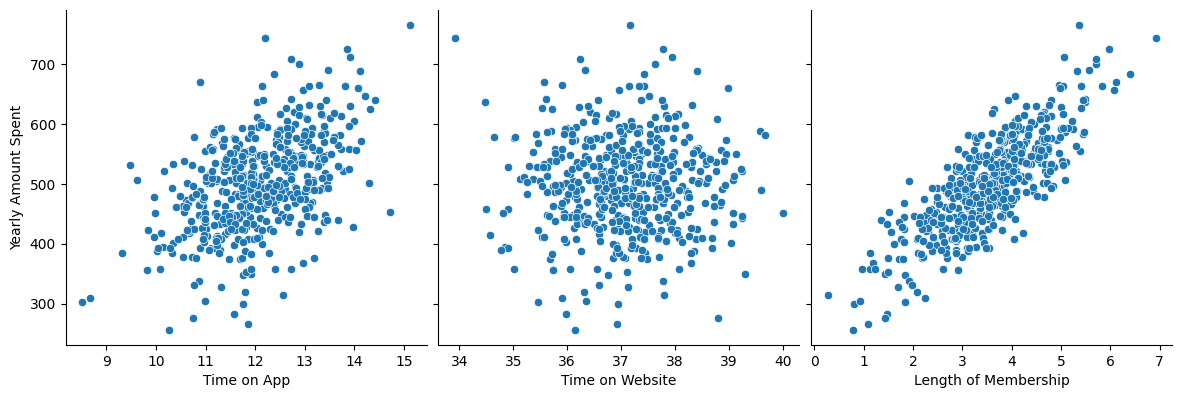

In [ ]:
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

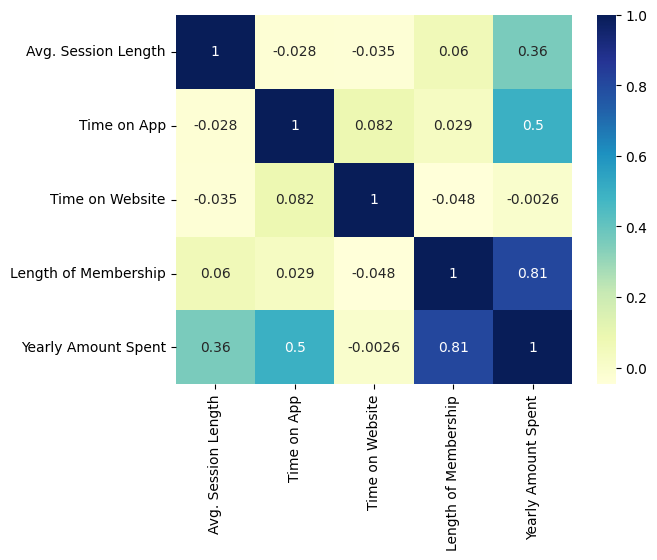

In [ ]:
data_numeric = data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(data_numeric.corr(), cmap="YlGnBu", annot=True)
plt.show()

####Langkah 5: Regresi Linier

Memisahkan variabel bebas (X) dan variabel target (Y)

In [ ]:
X = data['Length of Membership']
Y = data['Yearly Amount Spent']

Membagi data menjadi data latih (70%) dan data uji (30%) menggunakan train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

Melakukan training model regresi linier dengan library StatsModels.

In [ ]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(Y_train, X_train_sm).fit()

Visualisasi regresi pada data latih

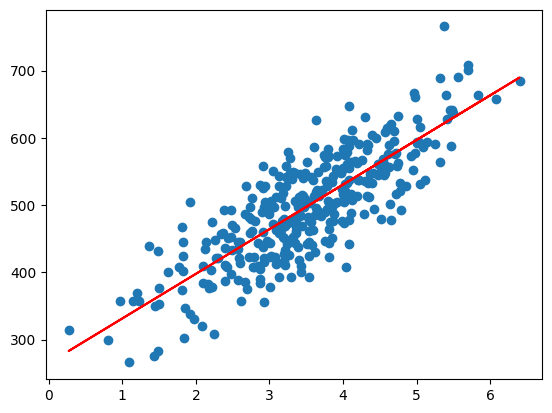

In [ ]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

####Langkah 7: Analisis Residual

Prediksi nilai y dari data latih dan menghitung residual (Selisih antar nilai actual dan nilai prediksi).

In [ ]:
y_train_pred = lr.predict(X_train_sm)

res = (Y_train - y_train_pred)

/tmp/ipython-input-2235641.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


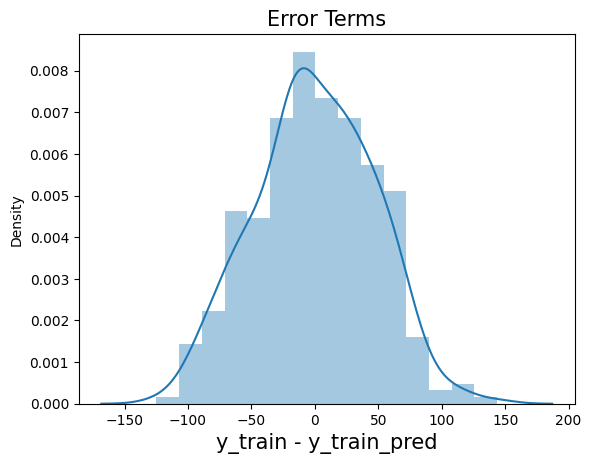

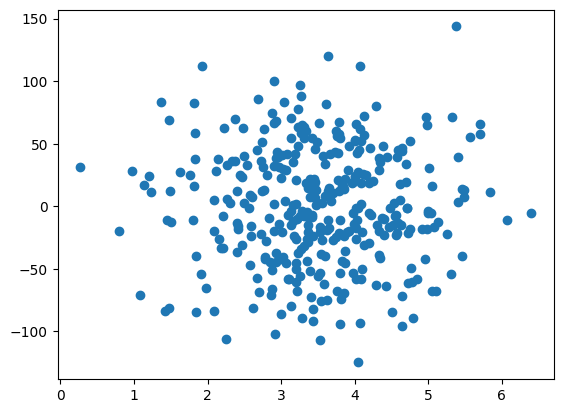

In [ ]:
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

####Langkah 7: Prediksi pada Data Uji dan Evaluasi Model

In [ ]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

In [ ]:
from sklearn.metrics import r2_score

r_squared = r2_score(Y_test, y_test_pred)
print(r_squared)

0.611948913768747


####Langkah 8: Visualisasi Hasil

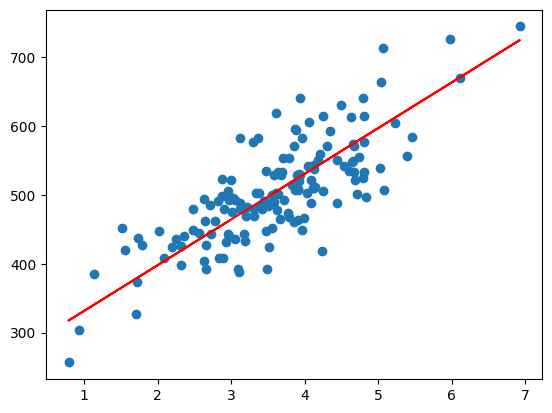

In [ ]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

###Praktikum 2 - SVR

####Langkah 1: Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

####Langkah 2: Load Dataset

In [ ]:
dataset = pd.read_csv('Posisi_gaji.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

####Langkah 3: Features Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

####Langkah 4: Fitting Model SVR

In [ ]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

####Langkah 5: Visualisasi Hasil SVR

/tmp/ipython-input-3098558964.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


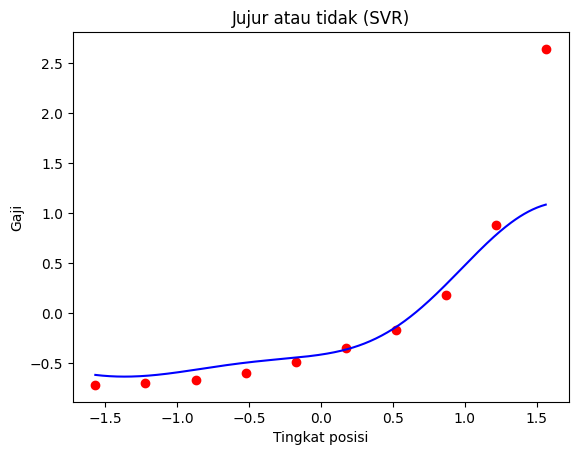

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

####Langkah 6: Prediksi Hasil

In [ ]:
tingkat_posisi_prediksi = np.array([[6.5]])
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

####Langkah 7: Menampilkan Hasil

In [ ]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


####Langkah 8: Evaluasi Model SVR

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual  = y
y_pred = regressor.predict(X)

mae = mean_absolute_error(y_actual, y_pred)
mse = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


###Tugas

####Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

#####Load Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#####Dataset

In [ ]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df_processed = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

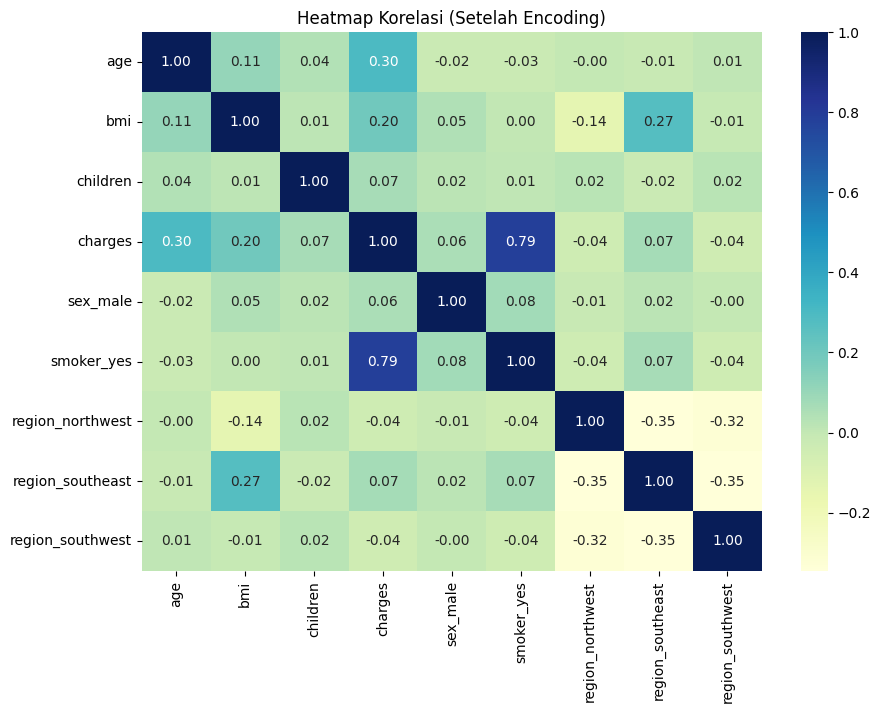

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_processed.corr(), cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Heatmap Korelasi (Setelah Encoding)')
plt.show()

Variabel bebas (X) = age dan variabel target (Y) = charges

In [ ]:
X = df_processed.drop('charges', axis=1)
Y = df_processed['charges']

####Feature Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)

####Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

Proporsi 70% train dan 30% test

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, train_size=0.7, test_size=0.3, random_state=100)

####Buat model multiple linear regression menggunakan Scikit-Learn.

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

####Latih model pada data latih dan lakukan prediksi pada data uji.

In [ ]:
y_pred = model.predict(X_test)

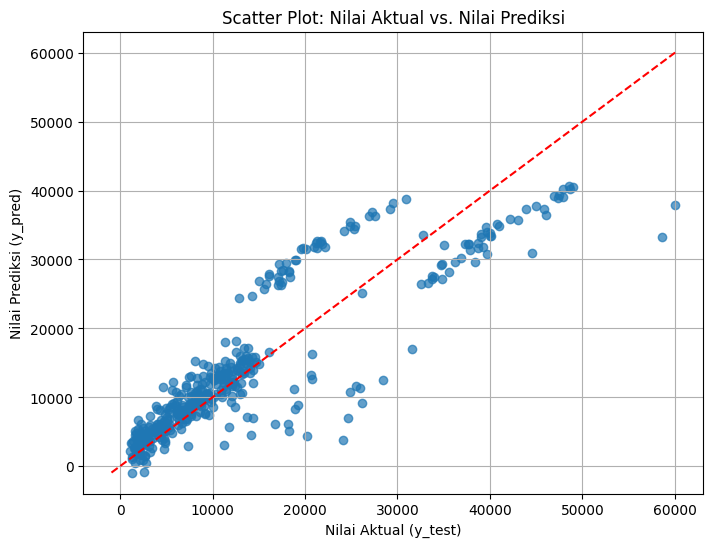

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred, alpha=0.7)

plt.xlabel("Nilai Aktual (y_test)")
plt.ylabel("Nilai Prediksi (y_pred)")
plt.title("Scatter Plot: Nilai Aktual vs. Nilai Prediksi")
min_val = min(Y_test.min(), y_pred.min())
max_val = max(Y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.grid(True)
plt.show()

####Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(Y_test, y_pred)

mse = mean_squared_error(Y_test, y_pred)

mae = mean_absolute_error(Y_test, y_pred)

print("\n--- Hasil Evaluasi Model ---")
print(f"R-squared (R2): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


--- Hasil Evaluasi Model ---
R-squared (R2): 0.7772
Mean Squared Error (MSE): 32345536.7485
Mean Absolute Error (MAE): 3943.2377


####Ulangi langkah 4 dengan menggunakan model SVR. Anda dapat bereksperimen dengan dengan melakukan hyperparameter tunning.

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import time

In [ ]:
param_grid = {
    'kernel': ['linear', 'rbf'],  # Uji kernel linear dan non-linear (rbf)
    'C': [1000, 5000, 10000],       # Parameter regularisasi.
                                   # (Nilai tinggi sering bekerja baik untuk dataset ini)
    'gamma': ['scale', 0.1, 0.01]  # Koefisien kernel (hanya digunakan oleh 'rbf')
}

membuat model grid search

In [ ]:
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

In [ ]:
start_time = time.time()
grid_search.fit(X_train, Y_train)
end_time = time.time()

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [ ]:
best_svr_model = grid_search.best_estimator_
y_pred_svr = best_svr_model.predict(X_test)

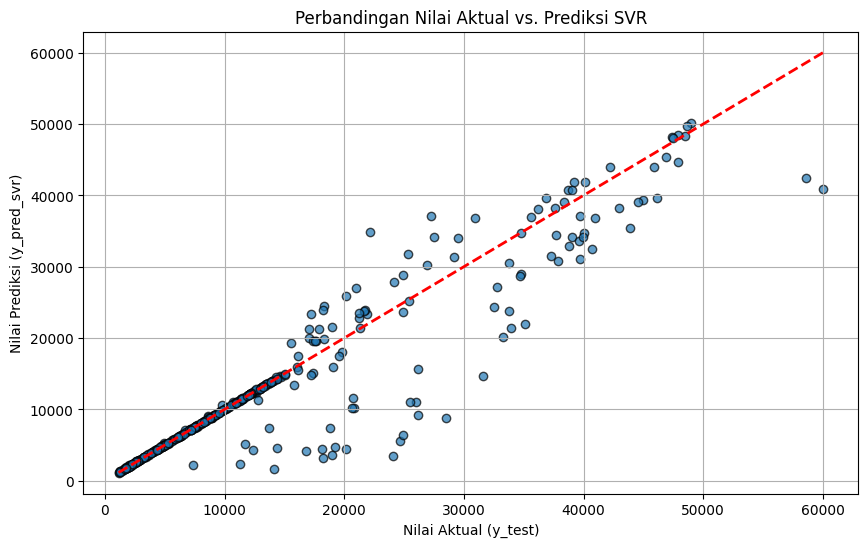

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred_svr, alpha=0.7, edgecolors='k')
plt.title('Perbandingan Nilai Aktual vs. Prediksi SVR')
plt.xlabel('Nilai Aktual (y_test)')
plt.ylabel('Nilai Prediksi (y_pred_svr)')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.grid(True)
plt.show()